In [5]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.decomposition import PCA 
import pandas as pd 
import numpy as np 


In [ ]:
iris = load_iris()
X= iris.data 
y = iris.target 
print(X.shape)

In [2]:
import pandas as pd 
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
pca = PCA(n_components=2)
pca.fit(X)
X_dr = pca.transform(X)
X_dr.shape

(150, 2)

In [4]:
colors = ['red', 'black', 'orange']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

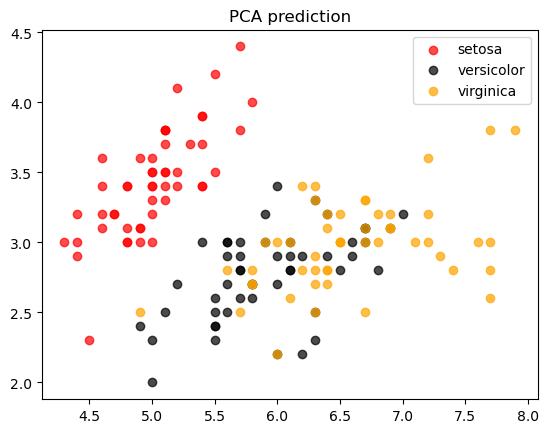

In [7]:
plt.figure()
for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1],
                alpha=0.7,
                c=colors[i],
                label=iris.target_names[i])
plt.legend()
plt.title('PCA prediction')
plt.show()

In [8]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [10]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [16]:
np.arange(X.shape[1])

array([0, 1, 2, 3])

## 累积可解释方差贡献率曲线

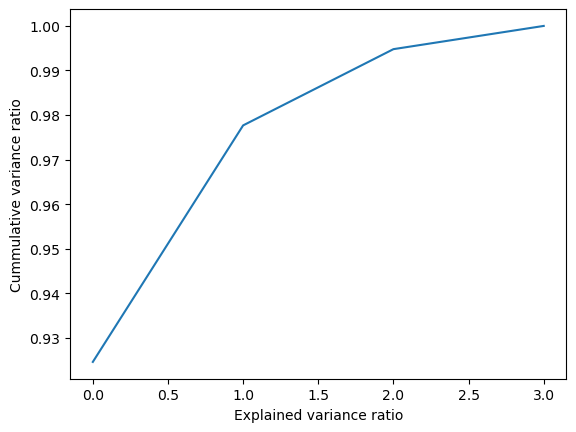

In [18]:
pca_ = PCA().fit(X)
plt.figure()
plt.plot(np.arange(X.shape[1]), np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel("Explained variance ratio")
plt.ylabel("Cummulative variance ratio")
plt.show()

## 最大似然估计自选超参数

In [19]:
pca_mle = PCA(n_components='mle')
pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle.shape

(150, 3)

: 

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
faces.images.shape

(1348, 62, 47)

In [3]:
faces.images[0]

array([[0.53333336, 0.52418303, 0.49673203, ..., 0.2653595 , 0.2653595 ,
        0.26013073],
       [0.56993467, 0.545098  , 0.4797386 , ..., 0.2627451 , 0.2627451 ,
        0.26013073],
       [0.5882353 , 0.5398693 , 0.475817  , ..., 0.2640523 , 0.26013073,
        0.25751635],
       ...,
       [0.59738564, 0.7176471 , 0.40261438, ..., 0.00653595, 0.00261438,
        0.00392157],
       [0.44575164, 0.793464  , 0.67058825, ..., 0.00522876, 0.00653595,
        0.00522876],
       [0.29673204, 0.69803923, 0.84313726, ..., 0.00653595, 0.00653595,
        0.00130719]], dtype=float32)

In [4]:
X = faces.data 
y = faces.target

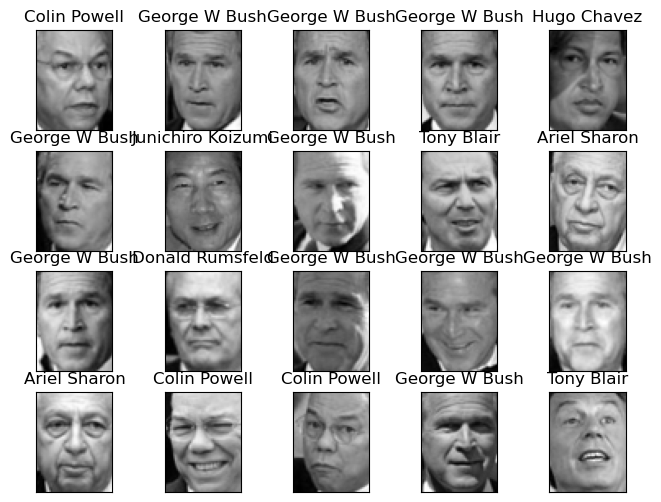

In [6]:
fig, axes = plt.subplots(4,5, figsize=(8,6),
                            subplot_kw={'xticks':(), 'yticks':()})
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:], cmap='gray')
    ax.set_title(faces.target_names[y[i]])
plt.show()


In [8]:
print(f'Original data shape, {X.shape}')

(1348, 2914)

In [16]:
pca = PCA(n_components=150)
X_dr = pca.fit_transform(X)
print(f'PCA model reduces data to {X_dr.shape}')

PCA model reduces data to (1348, 150)


In [11]:
pca.components_.shape

(150, 2914)

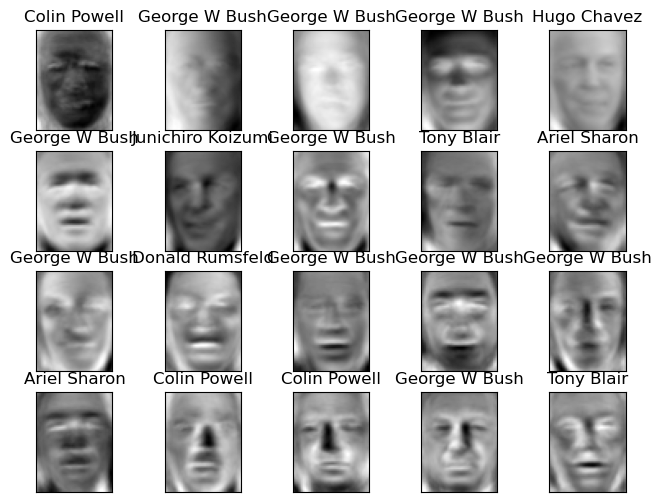

In [17]:
fig, axes = plt.subplots(4,5,figsize=(8,6),
                            subplot_kw={'xticks':(), 'yticks':()})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i,:].reshape(62,47), cmap='gray')
    ax.set_title(faces.target_names[y[i]])
plt.show()

In [18]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)

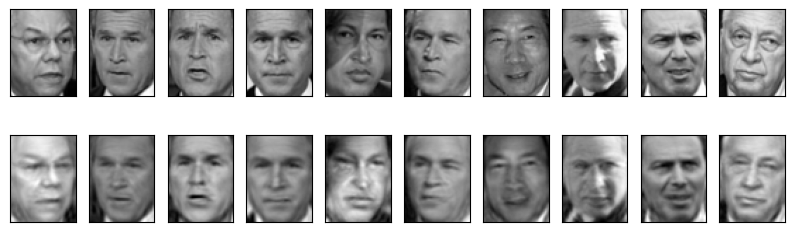

In [21]:
fig, ax = plt.subplots(2,10,figsize=(10,3), 
                       subplot_kw={'xticks':[],'yticks':[]}
)
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:], cmap='binary_r')
    ax[1,i].imshow(X_inverse[i].reshape([62,47]), cmap='binary_r')
                   
plt.show()

In [22]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import numpy as np 
digits = load_digits()
digits.data.shape

(1797, 64)

In [30]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
digits.data.shape

(1797, 64)

In [29]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

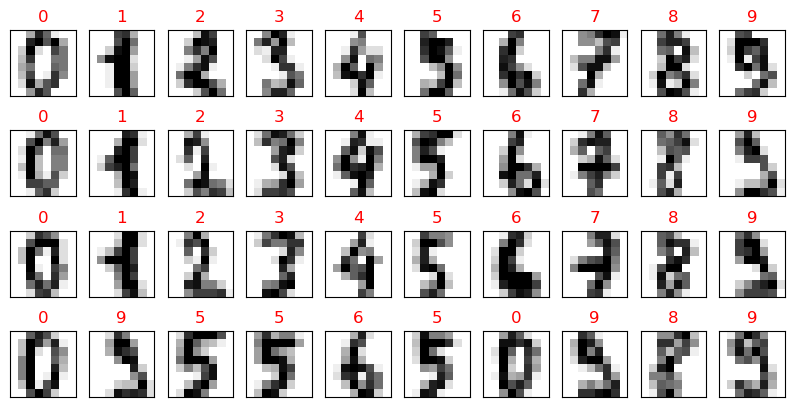

In [35]:
fig, axes = plt.subplots(4,10, figsize=(10,5),
                         subplot_kw=dict(xticks=[],yticks=[]))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8,8), cmap='binary', )
    ax.set_title(digits.target_names[digits.target[i]], color='r')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC 
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=666)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_dr = pca.transform(X_train)
X_test_dr = pca.transform(X_test)
X_dr = pca.transform(X)
print(f'X_train_dr shape: {X_train_dr.shape}')

X_train shape: (1347, 64)
X_test shape: (450, 64)
X_train_dr shape: (1347, 28)


In [47]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_dr, y, cv=5).mean()

0.8892757660167131